[TCC Matemática - Processamento de Sinais](https://www.dm.ufscar.br/dm/attachments/article/6/TCCJosiana.pdf)

pag 74

# Quick data analysis using Pandas

In [ ]:
import pandas as pd

In [ ]:
FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0102890318_20070206T133547_20070402T070302.csv'

We confirm that we are only working with DATABARRT and WHITEFLUXSYS columns

In [ ]:
df = pd.read_csv(FILE_PATH)
df.head()

DATEBARTT  WHITEFLUXSYS
0  54138.073885     219929.30
1  54138.079811     220816.39
2  54138.085737     220129.64
3  54138.091662     219876.34
4  54138.097588     219744.33

In this case, there are 9229 rows and 2 columns

In [ ]:
(row, columns) = df.shape
print(row, columns)

9228 2


Both columns do not have NaN values and they have *float64* Dtype

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9228 entries, 0 to 9227
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATEBARTT     9228 non-null   float64
 1   WHITEFLUXSYS  9228 non-null   float64
dtypes: float64(2)
memory usage: 144.3 KB


Statistical summary of data

In [ ]:
df.describe().T

count           mean  ...            75%            max
DATEBARTT     9228.0   54165.432390  ...   54179.114102   54192.791466
WHITEFLUXSYS  9228.0  221509.549025  ...  221933.035000  224749.330000

[2 rows x 8 columns]

### Before results

In [ ]:
import plotly.express as px

fig = px.line(df, x='DATEBARTT', y='WHITEFLUXSYS', title='Light Curve')
fig.show()

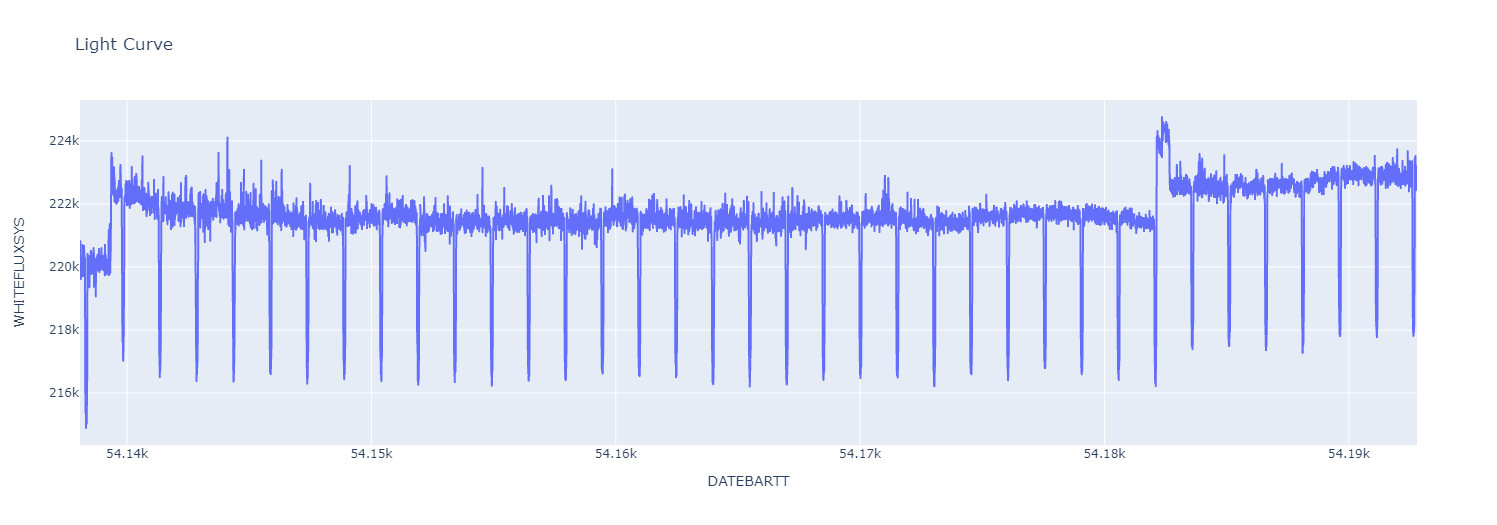

# Transforming into an array

In [ ]:
df.head()

DATEBARTT  WHITEFLUXSYS
0  54138.073885     219929.30
1  54138.079811     220816.39
2  54138.085737     220129.64
3  54138.091662     219876.34
4  54138.097588     219744.33

In [ ]:
import numpy as np

In [ ]:
y = df.WHITEFLUXSYS.to_numpy()

In [ ]:
x = df.DATEBARTT.to_numpy()

In [ ]:
import pprint as pp

pp.pprint(y)
print('')
pp.pprint(date)

array([219929.3 , 220816.39, 220129.64, ..., 222813.8 , 223179.67,
       222808.1 ])

array([54138.07388529, 54138.07981095, 54138.08573661, ...,
       54192.77961555, 54192.78554097, 54192.79146639])


# Artificial borders (OK)
Returns: datebartt_artificial_borders and whiteflux_artificial_borders

Type: ndarray

Len: 

In [ ]:
def artificial_borders(array, num):
  aux_pre = np.zeros(num)
  aux_pos = np.zeros(num)
  i = 0
  for i in range(num):
    aux_pre[i] = array[0]
    aux_pos[i] = array[-1]
  
  return np.concatenate((aux_pre, array, aux_pos)).ravel()

In [ ]:
param = 15

In [ ]:
whiteflux_artificial_borders = artificial_borders(y, param)
pp.pprint(whiteflux_artificial_borders)

array([219929.3, 219929.3, 219929.3, ..., 222808.1, 222808.1, 222808.1])


In [ ]:
datebartt_artificial_borders = artificial_borders(x, param)
pp.pprint(datebartt_artificial_borders)

array([54138.07388529, 54138.07388529, 54138.07388529, ...,
       54192.79146639, 54192.79146639, 54192.79146639])


In [ ]:
fig = px.line(x=datebartt_artificial_borders, y=whiteflux_artificial_borders, title='Light Curve with Artificial Borders')
fig.show()

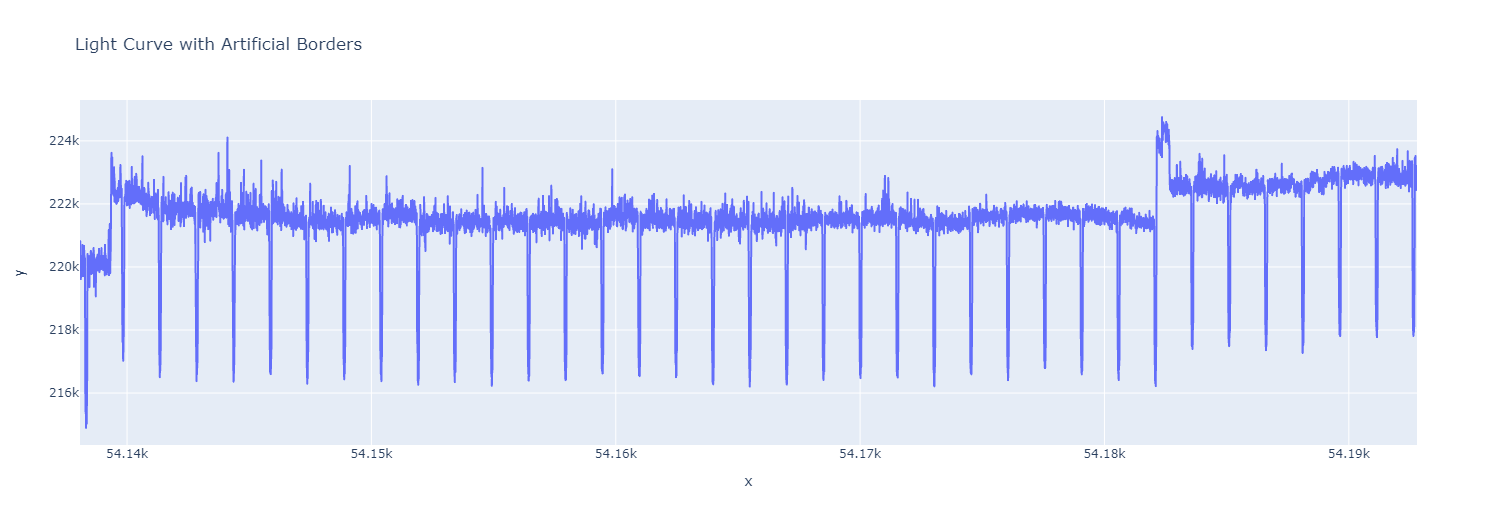

# Multiplying the light curve by -1^(i) (OK)
Returns: datebartt_multiplied and whiteflux_multiplied

Type:

Len:

In [ ]:
def multiplying_by_minus_one_to_index(array):
  i = 0
  new_array = np.ones(len(array))

  for i in range(len(array)):
    new_array[i] = array[i] * ( (-1)**(i) )
  
  return new_array

In [ ]:
whiteflux_multiplied = multiplying_by_minus_one_to_index(whiteflux_artificial_borders)
pp.pprint(whiteflux_multiplied)

array([ 219929.3, -219929.3,  219929.3, ..., -222808.1,  222808.1,
       -222808.1])


In [ ]:
datebartt_multiplied = datebartt_artificial_borders

In [ ]:
fig = px.scatter(x=datebartt_multiplied, y=whiteflux_multiplied, title='Light Curve Multiplied')
fig.show()

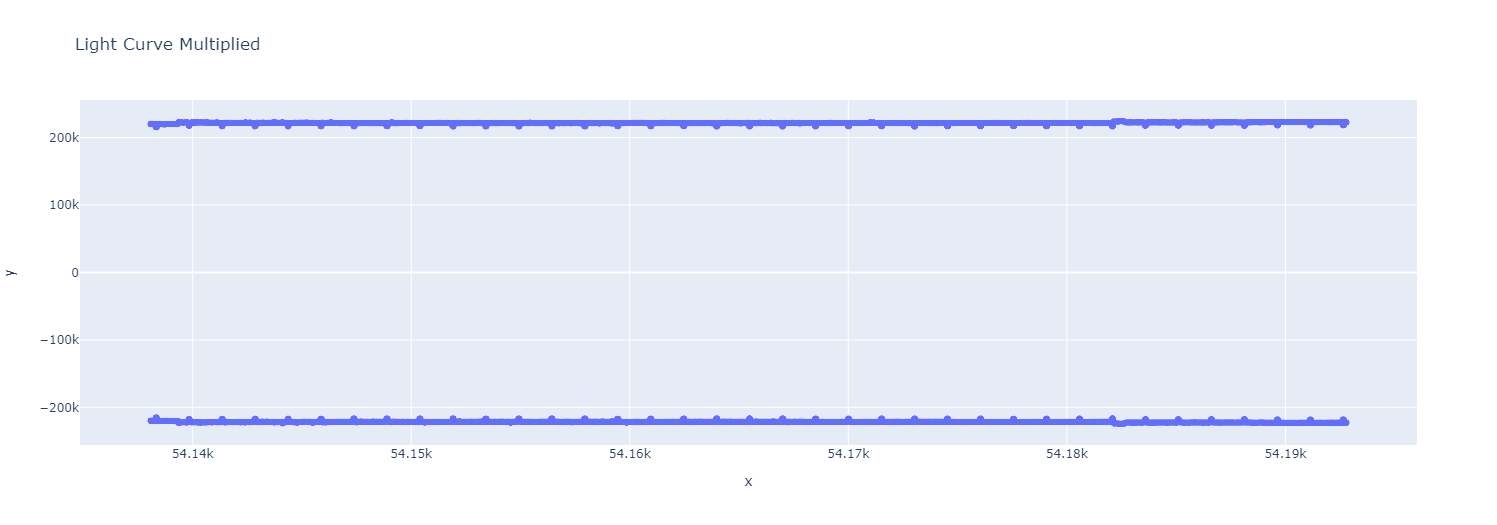

# Padding (OK)
Returns: datebartt_padding and whiteflux_padding

Type:

Len:

In [ ]:
def padding(array):
  return np.append(array, np.zeros(len(array)))

In [ ]:
whiteflux_padding = padding(whiteflux_multiplied)
print(len(whiteflux_padding))

18516


In [ ]:
datebartt_padding = padding(datebartt_multiplied)
print(len(datebartt_padding))

18516


In [ ]:
fig = px.scatter(x=datebartt_padding, y=whiteflux_padding, title='Light Curve Padded')
fig.show()

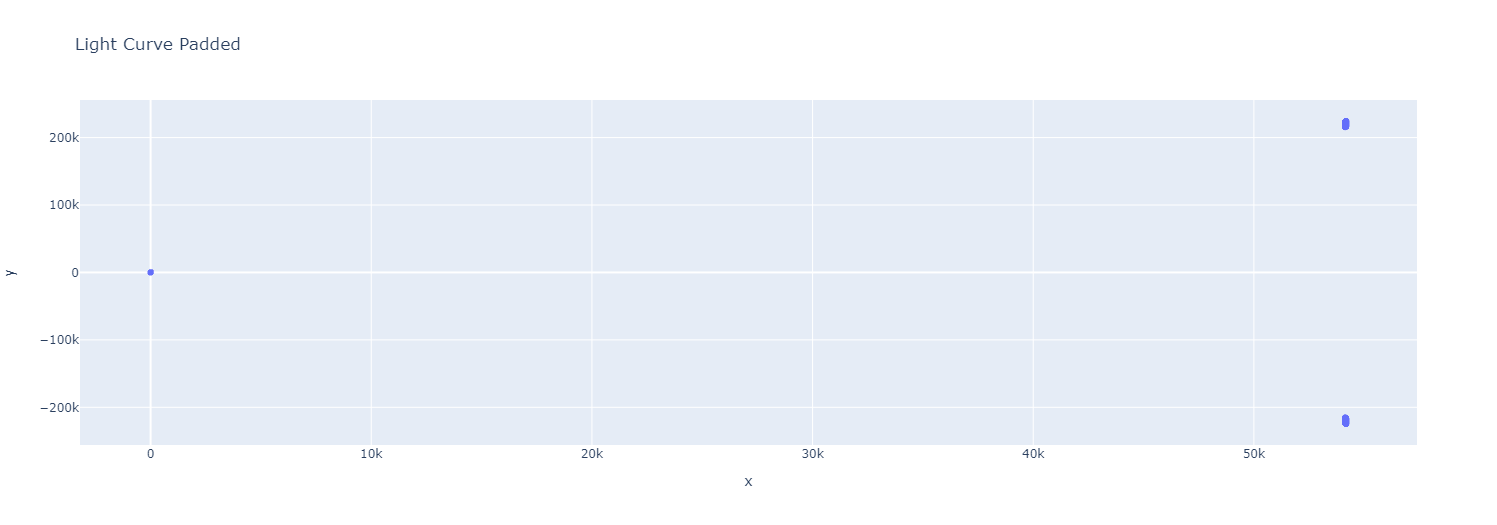

In [ ]:
y_fft = np.real(np.fft.fft(y))

In [ ]:
len(y_fft)

18516

Testes

In [ ]:
y_test = df.WHITEFLUXSYS.to_numpy()

In [ ]:
y_test_2 = multiplying_by_minus_one_to_index(y_test)

In [ ]:
y_test_fft = np.fft.fft(y_test_2)

In [ ]:
# Remover valor maximo para plotar

y_test_fft_real = np.real(y_test_fft)

i = np.where(y_test_fft_real == np.max(y_test_fft_real))

y_test_fft_real_new = np.delete(y_test_fft_real, i)

# Excluindo 1 item do x

x_new = np.delete(date, i)

In [ ]:
fig = px.line(x=x_new, y=y_test_fft_real_new, title='Teste')
fig.show()

# Butterworth Filter
Returns: y_butter

Type:

Len:

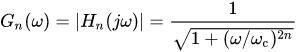

where:

- G is the gain of an n-order Butterworth low-pass filter
- H is transfer funcion
- j is imaginary number
- n is the order of the filter
- ω  is the angular frequency in radians per second,
- ${\displaystyle \omega _{\mathrm {c} }}{\displaystyle \omega _{\mathrm {c} }}$ is the cutoff frequency.

In [ ]:
def butter_lowpass_filter(cutoff_freq, sampling_rate, order = 2):
  from scipy.signal import butter
  nyqs = 0.5 * sampling_rate
  normal_cutoff_freq = cutoff_freq / nyqs

  b, a = butter(order, normal_cutoff_freq, btype='low', analog=False)

  return b, a

In [ ]:
def filter_signal(data, cutoff_freq, sampling_rate, order = 2, filtertype = 'lowpass'):
  from scipy.signal import butter, filtfilt
  if filtertype.lower() == 'lowpass':
    b, a = butter_lowpass_filter(cutoff_freq, sampling_rate, order = order)

  filtered_data = filtfilt(b, a, data)

  return filtered_data

In [ ]:
y_butter = filter_signal(whiteflux_padding, cutoff_freq=0.7, sampling_rate=100, order=4, filtertype='lowpass')

In [ ]:
fig = px.scatter(x=datebartt_padding, y=y_butter, title='Light Curve Filtered')
fig.show()

# "Re-multiplying" the light curve by -1^(i) (OK)
Returns: y1

Type:

Len:

In [ ]:
y1 = multiplying_by_minus_one_to_index(np.real(y_butter))

In [ ]:
fig = px.scatter(x=datebartt_padding, y=y1, title='Light Curve')
fig.show()

# Undoing Padding (OK)
Returns: y2 and t2

Type:

Len:

In [ ]:
y2 = y1[:int(len(y1)/2)]

In [ ]:
t2 = datebartt_padding[:int(len(datebartt_padding)/2)]

In [ ]:
fig = px.line(x=t2, y=y2, title='Light Curve')
fig.show()

# Cutting artificial borders (OK)

In [ ]:
param = 15

In [ ]:
y3 = np.delete(y2, np.s_[:param])
len(y3)

9243

In [ ]:
t3 = np.delete(t2, np.s_[:param])
len(y3)

9243

In [ ]:
y4 = np.delete(y3, np.s_[-param:])
len(y4)

9228

In [ ]:
t4 = np.delete(t3, np.s_[-param:])
len(y4)

9228

In [ ]:
fig = px.line(x=t4, y=y4, title='Light Curve')
fig.show()

# Plot

In [ ]:
fig = px.line(x=t4, y=y4, title='Light Curve')
fig.show()

In [ ]:
a_fft = np.real(np.fft.fft(y4))

a = multiplying_by_minus_one_to_index(a_fft)

a_ifft = np.real(np.fft.ifft(a))

fig = px.line(x=t4, y=a_ifft, title='Light Curve')
fig.show()